# Prediction Model



In [1]:
# importing librairies ...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

# %matplotlib notebook

In [2]:
# The first step is to retrieve cleaned data 
df = pd.read_csv('./dataset/immoCollect18-clean.csv', index_col = 0)
# df52 = pd.read_csv('./dataset/immoCollect52-clean.csv', index_col = 0)

## Cleaning / manipulation 

First, I'm going to do a little data cleansing to make sure that it corresponds precisely to my expectations for this project.

In [3]:
print(df.shape)
df.head()

(11227, 8)


,price,type_of_property,is_new,postal_code,house_area,number_of_bedroom,garden,terrace
0,280000,1,True,1180,65,1,True,True
1,282500,1,True,1180,73,1,False,True
2,412500,1,True,1180,100,2,False,True
3,380000,1,True,1160,87,2,False,True
4,165000,1,True,6000,63,1,False,False


In [4]:
def bool_to_int(boolean):
    if boolean == True:
        boolean = 1
        return boolean
    elif boolean == False:
        boolean = 0
        return boolean

In [5]:
df['is_new'] = df['is_new'].apply(bool_to_int)
df['garden'] = df['garden'].apply(bool_to_int)
df['terrace'] = df['terrace'].apply(bool_to_int)

In [6]:
df_house = df[df['type_of_property'] == 0]
df_apartment = df[df['type_of_property'] == 1]

In [7]:
df_house.head()

,price,type_of_property,is_new,postal_code,house_area,number_of_bedroom,garden,terrace
8616,289000,0,1,5650,230,4,1,1
8617,79900,0,0,6183,130,4,0,1
8618,165000,0,0,4031,94,2,1,1
8619,220000,0,0,4000,164,3,1,0
8620,285000,0,0,6044,180,3,1,1


In [8]:
df_apartment.head()

,price,type_of_property,is_new,postal_code,house_area,number_of_bedroom,garden,terrace
0,280000,1,1,1180,65,1,1,1
1,282500,1,1,1180,73,1,0,1
2,412500,1,1,1180,100,2,0,1
3,380000,1,1,1160,87,2,0,1
4,165000,1,1,6000,63,1,0,0


## Let's train and predict for HOUSE !

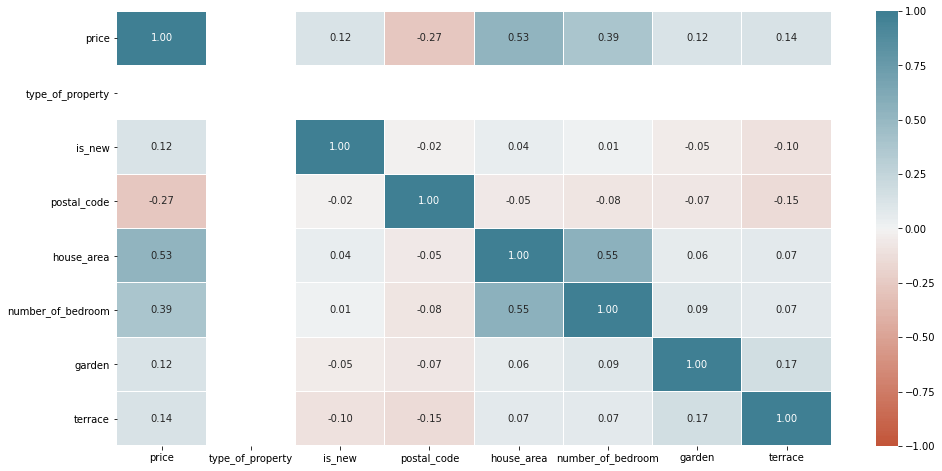

In [9]:
# Print the heatmap
plt.subplots(figsize=(16, 8))   
sns.heatmap(df_house.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

In [10]:
X = df_house.drop(columns='price')
X.head()

,type_of_property,is_new,postal_code,house_area,number_of_bedroom,garden,terrace
8616,0,1,5650,230,4,1,1
8617,0,0,6183,130,4,0,1
8618,0,0,4031,94,2,1,1
8619,0,0,4000,164,3,1,0
8620,0,0,6044,180,3,1,1


In [11]:
y = df_house[['price']]
y.head()

,price
8616,289000
8617,79900
8618,165000
8619,220000
8620,285000


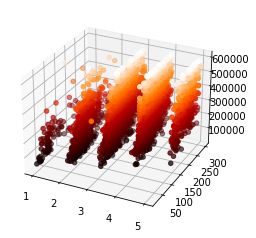

In [12]:
# %matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter3D( X['number_of_bedroom'],X['house_area'], y, c=y, cmap='gist_heat')
ax.view_init(27, -64)

### Split the dataset

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [15]:
regressor = linear_model.LinearRegression()
regressor.fit(x_train, y_train) # Entrainement du model

LinearRegression()

In [16]:
score = regressor.score(x_train,y_train)
score

0.37618471839598255